# 📈 Regression problems


<center><img src="https://miro.medium.com/max/1400/1*BT-K3d_tspyeePbQzMzE7g.png"></center>


Linear Regression is a method used to define a relationship between a dependent variable $(Y)$ and independent variable $(X)$.

 Which is simply written as :

<center><img src="https://miro.medium.com/max/722/1*nejpuvlh1MbMGQtve_1ztQ.png"></center>

Where $y$ is the dependent variable, $m$ is the scale factor or coefficient, $b$ being the **bias coefficient** and $X$ being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between $X$ and $Y$ which estimates the relationship between $X$ and $Y$.

where:

- $y$ is the value we're trying to predict

- $m$ is the slope of the line.

- $x$ is our input feature.

- $b$ is the y-intercept.

By convention in machine learning, you'll write the equation for a model slightly differently:

$$\hat{y} = b + w_1 x_1$$

where:

- $\hat{y}$ is the predicted label (a desired output)
- $b$ is the bias (the y-intercept), sometimes referred to as $w_0$ .
- $w_1$ is the weight of feature 1. Weight is the same concept as the "slope" $m$ in the traditional equation of a line.
- $x_1$ is a feature (a known input).

In a more formal way, we note call that equation the hypothesis function :

- $$\hat{y} = h_{\theta}(X) = \theta_{0} + \theta_{1}X$$ 

$X$ could be a vector of $n$ features, such as  :

$$ h_{\theta}(X) = \sum_{j=0}^n \theta_{j}x_{j} \\$$ 

$$
\theta_{j}=\left[\begin{array}{c}
\theta_{0} \\
\vdots \\\\
\theta_{n} \\
\end{array}\right]
$$

In the case of **Simple Regression**, we have a parameters vector $\theta_{j}$ such as :


$$
 \theta_{j}=\left[
\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\end{array}\right]$$

<strong> The parameter $\theta$ is usually called the weight.</strong>

<h4  style="font-family: Arial; font-size:1.4em;color:gold;">But how do we find these parameters' coefficients ? </h4>

We can find these using different approaches. 

The goal is to choose $\theta$ such as $h_{\theta}(X) \approx y$ for training set.

This is usually done by the **Least Mean Square** Method approach and the Gradient Descent approach.

 We will be implementing the Ordinary Least Mean Square Method.


## The Mean Square Error

**The mean Square Error is also called a loss function.**

The linear regression models we'll examine here use a loss function called squared loss (also known as $L_2$ loss). The squared loss for a single example is as follows:

```
cost  = the square of the difference between the label and the prediction
cost  = (observation - prediction(x))²
cost  = (y - y')²
```


Mean square error (MSE) is the average squared loss per example over the whole dataset. 

To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$$MSE = \frac{1}N \sum_{(x,y) \in D}(y - prediction(x))^2$$

Where :

- $(x,y)$ :
  - $x$ being set of features that the model used for predictions, 
  - $y$ is the example's label.
  
  
- $N$ : number of examples in dataset D

Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.

In [64]:
def MSE(y,prediction):
  loss = y - prediction
  N = len(y)
  return np.sum(loss ** 2) / N

## Reducing Loss

To train a model, we need a good way to reduce the model’s loss. An iterative approach is one widely used method for reducing loss, and is as easy and efficient as walking down a hill.

<center><img src="https://developers.google.com/machine-learning/crash-course/images/GradientDescentDiagram.svg" width=850></center>

In order to get $\theta$ such as $h_{\theta}(X) \approx y$, we need to get the smallest MSE value, which is equivalent to finding the minimum of the loss function.

<p id="loss">We can define that loss function as : </p>

$$ J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2$$

$\theta$ is a $n$-dimension vector; the loss function is also going to be a $n$-dimension one.

*The loss function can also be called cost function.*


Reducing Loss is made using the **Gradient Descent** algorithm.

# 🎢 What in the world is the Gradient ? 

Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.
A gradient for an $n$-dimensional function $f(x)$ at a given point p is defined as follows:



$$
\nabla f(p)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x_1}(p)\\\\
\dfrac{\partial f}{\partial x_2}(p) \\\\
\vdots \\\
\dfrac{\partial f}{\partial x_n}(p) 
\end{array}\right]
$$

Let's consider the function bellow :
$$
f(x,y) = 0.5x^2 + y^2
$$

In [1]:
def f(x,y):
  return 0.5*x**2 + y**2

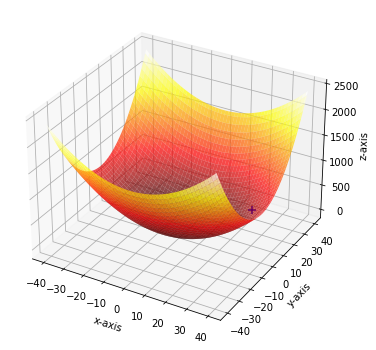

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6,15))
ax = fig.gca(projection='3d')   # Create the axes

# Data
X = np.linspace(-40, 40, 100)
Y = np.linspace(-40, 40, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the 3d surface

surface = ax.plot_surface(X, Y, Z,                  
                          rstride = 2,
                          cstride = 2,
                          alpha = .7,
                          cmap=cm.hot, 
                          linewidth=0, 
                          antialiased=True)

ax.scatter(30,10,f(30,10), marker='+', zorder=10, c="b",s=50)


# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Let’s assume we are interested in a gradient at point $p(10,10)$:

$$
\dfrac{\partial f}{\partial x}(x,y)=x \\\\\\\\\\\
\\\\\

\dfrac{\partial f}{\partial y}(x,y)=2y\\

$$


$$
\nabla f(x,y)=\left[\begin{array}{c}
\dfrac{\partial f}{\partial x}(p) \\\\

\dfrac{\partial f}{\partial y}(p) 
\end{array}\right]
$$



so consequently:

$$\nabla f(x,y)=\left[\begin{array}{c}
 x \\
 2y \\

\end{array}\right]

\\\\\\
$$



$$
 \nabla f(10,10)=\left[
\begin{array}{c}
10 \\
20 \\
\end{array}\right]$$

By looking at these values we conclude that the slope is twice steeper along the y axis.


## Gradient Descent

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate) and subtracts obtained value from the current position (makes a step).

It subtracts the value because we want to minimise the function (to maximise it would be adding). 
 
In our case,the function we would like to minimize and very frequently is the <a href="#loss">loss function</a>.
This process can be written as:

$$ \theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta) $$


$$0 \leq j\leq n $$ 

 There’s an important parameter $\alpha$ which scales the gradient and thus controls the step size. 

In machine learning, it is called **learning rate** and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point

- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

<h4 id="gradient" style="font-family: Arial; font-size:1.4em;color:gold;"> How de we compute the Gradient of the loss function then ? </h4>

After defining the concepts above, we ended up with 3 main equations : 

The hypothesis equation :
$$
\hat{y} = h_{\theta}(X) = \theta X =  \theta_{0} + \theta_{1}X  \tag{1}
$$

The cost/loss function :
$$
 J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2  \tag{2}
$$

The gradient descent : 

$$
\theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta)  \tag{3}
$$

By substituting $1^{st}$ in $2^{nd}$ and then $2^{nd}$ in $3^{rd}$, we get :


$$
\theta_{j} := \theta_{j} - \alpha\frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) X_{j}^\top \tag{4}
$$
In our Gradient Descent algorithm, we will repeat $(4)$ for $m$ samples in the training set, in each iteration $j$ until finding local minima.

The goal is to make it converge.


For a more intuitive notation, we can rewrite the hypothesis equation such as : 

$$
h_{\theta}(X) = \beta + \theta X  \tag{1}
$$

- $\beta$ being the bias (the y-intercept), sometimes referred to as $\theta_{0}$ 
- $\theta$ being the weight,
- $X$ the vector of features (from 1 to $n$)

In this notebook, we would like to predict the benefice of a firm in different towns by focusing on these towns' inhabitants.

To do so, we will study the case of a set of given data with :
- $y$ being the benefice,
- $X$ inhabitants features.

We'll be using **Gradient Descent** method for prediction.

# 1️⃣ Single-feature Regression

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [66]:
df_houses = pd.read_csv('data/houses.csv')

In [67]:
df_houses.head()

,population,benefice
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [68]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   benefice    97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Defining X and y

In [69]:
X = df_houses['population'].values
X[:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [70]:
y = df_houses['benefice'].values
y[:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

Text(0, 0.5, 'Benefice x 1000')

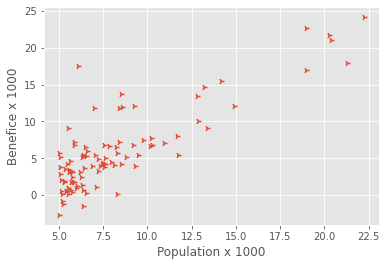

In [71]:
plt.scatter(X,y,marker="4")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')

We can clearly see that there may be a line passing through some these points.

In our first part of the work, we're going to find the parameters $(\theta_{0},\theta_{1})$ because the equation of the line is in the form of $y=\theta_{0} + \theta_{1}x$.

But how do we choose these values at the first iteration ? 
Generally, they are randomly generated or set to zero.


In [72]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features,1) 
  else:
    return np.zeros(shape=(n_features,1))

In [73]:
theta = initialize_theta(X.shape[1],is_random=True)
theta

IndexError: tuple index out of range

In [74]:
X.shape

(97,)

As you can see, this is raising an error because the shape of our features vector is $(97,)$.

- When it comes to Single-Feature Regression, we always ``reshape(-1,1)`` our features vector so it becomes a column-vector in order to make the dot product possible (used in LinearRegression() method of sckikit-learn)

In [75]:
X_reshaped = X.reshape(-1,1)
X_reshaped.shape

(97, 1)

In [76]:
theta = initialize_theta(X_reshaped.shape[1],is_random=True)
theta

array([[0.05416731]])

🔺 That is problematic, we are supposed to have a $\theta$ with two components, that is why we should be adding a column of ones to our features vector $X$. 

Since the equation $y=\theta_{0} + \theta_{1}x$., $\theta_{0}$ is implicitly multiplied by 1. 

Put another way consider the $i^{th} (x,y)$ pair :

$$y^{(i)} = \theta_{0} + \theta_{1}x^{(i)} \iff y^{(i)} = \theta_{0} \times 1 + \theta_{1}x^{(i)} \\$$

- Another way of dealing with this problem is to add a column of ones to the single-feature X vector.


The ``reshape(-1,1)`` step is always required when you're working with sklearn inbuilt functions.


Let's create a function that always add a column $\theta_{0}$ for any $X$ features vector. 

In [77]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  X_stacked = np.vstack((intercept, X.T)).T
  return X_stacked

In [78]:
X = add_theta_0(X)
X.shape

(97, 2)

We now have this shape for X input vector.

In [79]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

``Y_hat`` is the predicted output value whereas $Y$ will be the actual value. 

The difference between these will give us our **cost function**. Which will be calculate in our next function.

Let's define as well a function to predict $Y$ (or $\hat{y} = h_{\theta}(X)$).

As a reminder, $\theta^T  x$ is equivalent to $X  \theta $ where $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

In [199]:
def h_theta(X,theta):
  """
  This is the predict(X) function that returns y_hat.
  """
  return X.dot(theta)

In [200]:
def prediction(X,theta):
  return np.sum(np.multiply(X,theta.T), axis=1)

Since we fixed the shape of our features vector $X$, let's re-initialize $\theta$ values.

In [201]:
theta = initialize_theta(X.shape[1],is_random=True)
theta

array([[0.03869552],
       [0.46941507]])

In [202]:
y_hat = h_theta(X,theta)
y_hat[:3]

array([[2.90686853],
       [2.63348119],
       [4.03745472]])

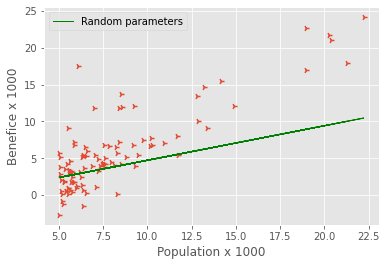

In [205]:
plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_hat, color='green', linewidth=1,label="Random parameters")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

This model, obviously, does not fit our data. Sure, it touches some points but it was pure random.

As highlighted by the blue lines connecting dots with the red line, the Hypothesis *“touches”* some of the y values, but the rest of the $h_{\theta}$ vector is far from the minimum. So we are tempted to guess which $\theta$ could predict $y$ when setting with different values. We could choose $\theta$ “by trial and error” to minimize all the distances between the Hypothesis and y. 

To accomplish this goal, we can calculate the Cost Function for our model.

### 💱 Cost function

This function will help us compute $J(\theta_0,\theta_1)$.

We'll be using the MSE defined at the beginning.

$$ J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2$$



In [206]:
def mean_squared_error(y,h_theta):
  loss = h_theta - y
  m = len(y) 
  return 1/(2*m) * np.sum(loss ** 2)

In [207]:
def get_cost(X,y,theta):   
           
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    # Calculate the Cost J, the reshape is needed to make sure h and y are substracted element-wise
    J = mean_squared_error(y.reshape(-1,1),h)
    
    return J

In [208]:
# Try some random theta, and produce a table with 
# random theta values and their relative J
import random 

print("t_0 \t   t_1", " \t   J") # write an header

for x in range(10):
    theta_0 = random.random()
    theta_1 = random.random()
    theta = np.asarray([theta_0, theta_1]).astype(float)
    # Calculate J and print the table
    print('{:.3f} \t {:.3f} \t\t{:.3f}'.format(theta[0],theta[1], get_cost(X, y, theta)))

t_0 	   t_1  	   J
0.722 	 0.057 		2510.089
0.623 	 0.756 		1912.679
0.145 	 0.712 		1822.787
0.327 	 0.077 		2616.835
0.819 	 0.694 		1823.404
0.603 	 0.746 		1892.505
0.341 	 0.394 		1822.280
0.002 	 0.923 		2208.518
0.087 	 0.501 		1772.207
0.623 	 0.493 		1701.238


After 10 runs on randomly selected $\theta$, the behavior of $J$ is unpredictable. Moreover, there is no way to guess $J$ basing on $\theta$.

## 🎢 Gradient Descent Implementation
- The algorithm will repeat until it will converge (will stop when reaches maximum number of iterations or very small derivatives).

- $\theta$ updating has to be simultaneous.

- We will use the functions deduced at <a href="#gradient">this section</a>.


In [210]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  """
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  """
  start = time.time()
  # Number of training examples
  m = len(y)
  y_true = np.copy(y).reshape(-1,1)          
         
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  
  # Append the initial cost
  gd_iterations_df.loc[result_idx]=[0,get_cost(X,y,theta)]
  result_idx += 1
  
  for i in range(1,num_iters):
      # Step 1 : Calculate h = X * theta
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y_true)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.multiply(X, error),axis=0).reshape(-1,1)
      
      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)
      
      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y_true,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - t_0: {:.4f} - t_1: {:.4f}'.format(i+1,num_iters,cost,theta[0],theta[1]))
          
  print('Time spent: %0.2fs' % (time.time()-start))  
  return theta, theta_history, J_history,gd_iterations_df
    

# 💰 Let's try on our data

In [211]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([[0.],
       [0.]])

In [212]:
h_init = h_theta(X,theta)
h_init[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Let's compute the initial cost.

In [213]:
initial_cost = get_cost(X,y,theta)
print('initial_cost : ',initial_cost)

initial_cost :  32.072733877455676


Let's play around with some parameters.

In [214]:
iterations = 2000
my_alpha = 0.01

In [215]:
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta=theta,num_iters=iterations,alpha=my_alpha)

Time spent: 1.53s


In [216]:
gd_iterations_df

,iteration,cost
0,0.0,32.072734
1,1.0,6.737190
2,2.0,5.931594
3,3.0,5.901155
4,4.0,5.895229
...,...,...
1995,1995.0,4.478047
1996,1996.0,4.478043
1997,1997.0,4.478039
1998,1998.0,4.478035


We end up with some new values for $\theta$ vector. Let's plot the graph and see our line.

In [217]:
theta

array([[-3.78787406],
       [ 1.18219323]])

In [219]:
y_pred = h_theta(X,theta)

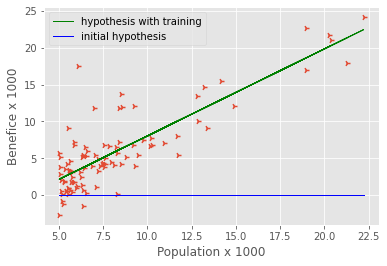

In [220]:
plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_pred, color='green', linewidth=1,label="hypothesis with training")
plt.plot(X[:,[1]], h_init, color='blue', linewidth=1,label="initial hypothesis")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

### 📑 Cost History

Let's plot the cost function

Text(0, 0.5, 'MSE')

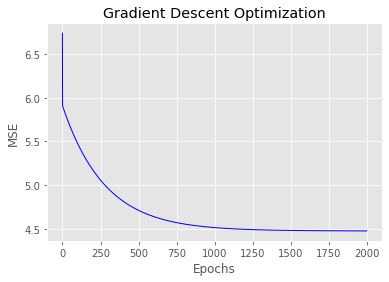

In [221]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.title('Gradient Descent Optimization')
plt.xlabel("Epochs")
plt.ylabel("MSE")

Let's plot the theta history

In [231]:
history = np.asarray(theta_history)
history.shape

(1999, 2, 1)

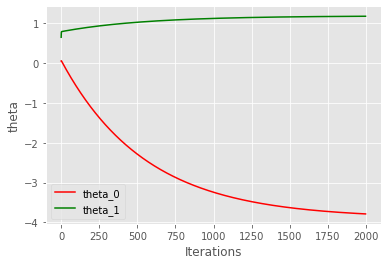

In [238]:
theta_0 = history[:,0]
theta_1 = history[:,1]

plt.plot(theta_0[0:len(theta_0)], color='red', label='theta_0')
plt.plot(theta_1[0:len(theta_1)], color='green', label='theta_1')
plt.xlabel("Iterations")
plt.ylabel("theta")
plt.legend()

Text(0.5, 0, 'J')

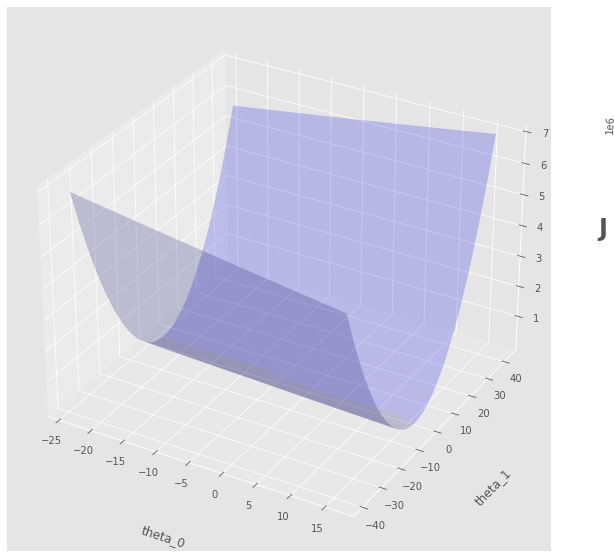

In [239]:
from mpl_toolkits.mplot3d import Axes3D
ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([get_cost(X, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.set_xlabel('theta_0', labelpad=30, fontsize=12)
ax.set_ylabel('theta_1', labelpad=30, fontsize=12)
ax.set_zlabel('J', labelpad=30, fontsize=24, fontweight='bold')

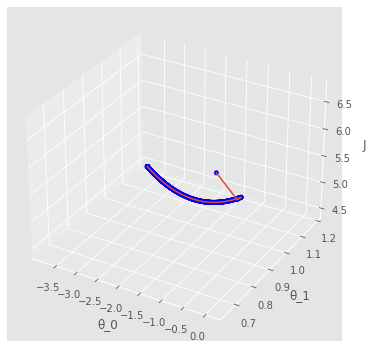

In [240]:
cost_history = np.array(J_history)
fig = plt.figure(figsize=(6,15))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = theta_0.reshape(-1,)
yline = theta_1.reshape(-1,)
zline = cost_history
ax.plot3D(xline, yline, zline)
ax.scatter3D(xline, yline, zline, c='blue', cmap='Greens')

# Set some labels
ax.set_xlabel('θ_0')
ax.set_ylabel('θ_1')
ax.set_zlabel('J')
plt.show()

# 🔮 Predictions

In [241]:
def predict(X,theta):
  if X.shape[0] != theta.shape[0]:
    # In this case, we add the 1 column for theta_0
    X_stacked = add_theta_0(X)
  return X_stacked.dot(theta)

Let's predict some values for a given population (35000 and 70000 inhabitants).

In [242]:
population1 = np.array([3.5])
predict1 = predict(population1,theta)
print('For {} inhabitants -> benefice would be : {:.2f}'.format(population1[0]*1000,predict1[0][0]*1000))

For 3500.0 inhabitants -> benefice would be : 349.80


In [243]:
population2 = np.array([7.0])
predict2 = predict(population2,theta)
print('For {} inhabitants -> benefice would be : {:.2f}'.format(population2[0]*1000,predict2[0][0]*1000))

For 7000.0 inhabitants -> benefice would be : 4487.48


These values seems pretty decent, let's plot them and see their position in the graph.

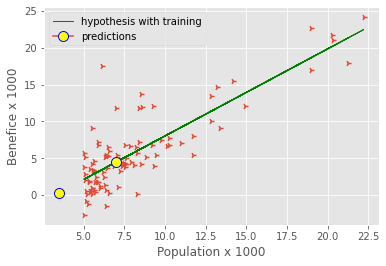

In [244]:
plt.scatter(X[:,[1]], y,marker="4",zorder=1)
plt.plot(X[:,[1]], y_pred, color='green', linewidth=1,label="hypothesis with training",zorder=2)
plt.plot(population1[0], predict1, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="yellow",label="predictions",zorder=10)
plt.plot(population2[0], predict2, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="yellow",zorder=10)
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

# 👩🏻‍🏫 The Normal Equation 

It is not always necessary to run an optimization algorithm to perform linear regression. You can solve a specific algebraic equation — the normal equation — to get the results directly. Although for big datasets it is not even close to being computationally optimal, it‘s still one of the options good to be aware of.

**Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function**. We can directly find out the value of θ without using Gradient Descent. Following this approach is an effective and a time-saving option when are working with a dataset with small features.

Normal Equation is a follows :

$$ \theta = (X^{\top}X)^{-1} \cdot(X^{\top}y) $$

Let's go ahead and implement it.

In [245]:
def normal_equation_parameters(X,y):
  """
  Given X with n features and y the target variable, will return the values of the best values for theta.
  """
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta

In [246]:
X = df_houses['population'].values

In [247]:
X = add_theta_0(X)

In [248]:
y = y.reshape(y.shape[0],1)

In [249]:
theta_normal = normal_equation_parameters(X,y)

In [250]:
theta_normal

array([[-3.89578088],
       [ 1.19303364]])

In [254]:
y_pred_normal = h_theta(X,theta_normal)

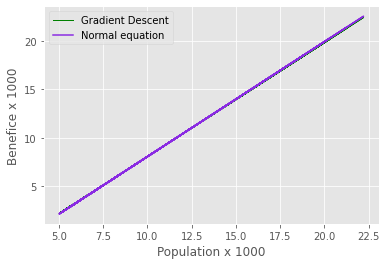

In [255]:
# plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_pred, color='green', linewidth=1,label="Gradient Descent")
plt.plot(X[:,[1]], y_pred_normal, color='blueviolet', linewidth=1.5,label="Normal equation")
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

# 📊 Multivariables Linear Regression

*Multiple linear regression* (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable.

In [256]:
df_houses_multi = pd.read_csv('data/house_multi.csv')

In [257]:
df_houses_multi.head()

,surface,rooms_nbr,price
0,2104,3,399900.0
1,1600,3,329900.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,539900.0


For this dataset, we would like to predict the price of a house from : 
- its surface,
- its number of rooms

In [258]:
X_multi = df_houses_multi[['surface','rooms_nbr']].values.astype(np.int32)
y_multi = df_houses_multi['price'].values
y_multi[:5]

array([399900., 329900., 369000., 232000., 539900.])

In [259]:
X_multi[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0, 0.5, 'Price')

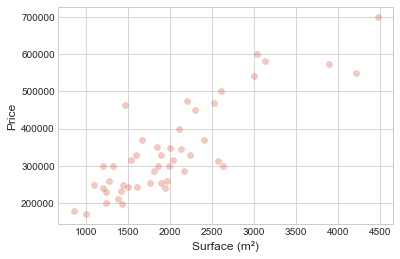

In [261]:
plt.scatter(X_multi[:,0], y_multi, alpha=0.3,cmap='viridis')
plt.xlabel('Surface (m²)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

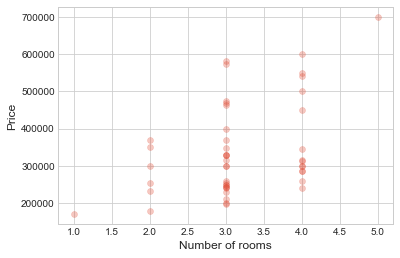

In [262]:
plt.scatter(X_multi[:,1], y_multi, alpha=0.3,cmap='PiYG')
plt.xlabel('Number of rooms')
plt.ylabel('Price')

# 🧹 Data Preprocessing

 Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

<center><img src="https://miro.medium.com/max/672/1*NSmq-HYqbK0XdNi_pL3JIg.png" width=700></center>



### 🔍 Scaling : Data Transformation

*Feature scaling* is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.


* **Methods for Scaling**: 
  - Normalization
  - Standardization
  - Scaling to unit length

  Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. 

The presence of feature value $X$ in the equation (4) will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

- 📏 Normalization

It is the method of scaling the data so that it can be represented in a smaller range. Example ranging from -1.0 to 1.0.

- 📐 Standartization 

*Feature standardization* makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula :

$$ 

x^{'} = \frac{x - \mu}{\sigma}
$$

Where :

- $\mu=0$ is the mean
- $\sigma$ the standard deviation


In [263]:
X_multi[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

Before adding the column of ones for $\theta_{0}$, we should scale our features.

As you may have noticed, if we run the Gradient Descent on our training set, a higher weight will be given to the surface of a room rather than its number of rooms.

For this notebook, we will be using Standartization with a zero-mean ($\mu=0$).

In [264]:
mu = X_multi.mean(axis=0)
sigma = X_multi.std(axis=0,ddof=1)
mu,sigma

(array([2000.68085106,    3.17021277]),
 array([7.94702354e+02, 7.60981887e-01]))

In [265]:
((np.subtract(X_multi, mu).astype(np.int32))/sigma)[:5]

array([[ 0.12960827,  0.        ],
       [-0.5033331 ,  0.        ],
       [ 0.50207477,  0.        ],
       [-0.73486633, -1.31409172],
       [ 1.25707442,  0.        ]])

In [266]:
def my_StandardScaler(X,zero_mean=False):
  
  if zero_mean:
    mu = 0
  else:
    mu = X.mean(axis=0)
    
  sigma = X.std(axis=0,ddof=1)

  
  X_norm = np.subtract(X, mu)
  X_norm = X_norm /sigma
  
  return X_norm

### 🎲 Running Gradient Descent on our data


- Let's first try the algorithm without scaling.

In [267]:
X_multi = add_theta_0(X_multi)
X_multi[:5]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00]])

In [303]:
theta_multi = initialize_theta(n_features=X_multi.shape[1],is_random=False)
theta_multi

array([[0.],
       [0.]])

In [304]:
iterations = 2000
alpha = 0.00000001

In [305]:
theta, theta_history, J_history,gd_iterations_df = gradient_descent(X_multi, y_multi, theta_multi,num_iters=iterations,alpha=my_alpha)

<ipython-input-206-680e07c7a899>:4: RuntimeWarning: overflow encountered in square
  return 1/(2*m) * np.sum(loss ** 2)
C:\Users\kawaremu\anaconda\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-210-edc503df0e37>:39: RuntimeWarning: invalid value encountered in subtract
  theta = np.subtract(theta, theta_new)


Time spent: 1.66s


🛑 Oops, seems like these parameters aren't helping, and the function diverged. 

There are two reasons for that, either :
- There is a problem with our parameters (learning rate and number of iterations),
- Our data are not scaled and therefore produce an overflow.

There's a <a src="https://en.wikipedia.org/wiki/Goldilocks_principle">Goldilocks</a> learning rate for every regression problem. The Goldilocks value is related to how flat the loss function is. If you know the gradient of the loss function is small then you can safely try a larger learning rate, which compensates for the small gradient and results in a larger step size.

*The Goldilocks principle is named by analogy to the children's story "The Three Bears", in which a young girl named Goldilocks tastes three different bowls of porridge and finds she prefers porridge that is neither too hot nor too cold, but has just the right temperature. In statistics, the "Goldilocks Fit" references a linear regression model that represents the perfect flexibility to reduce the error caused by the bias and variance.*

Let's go ahead and normalize our data since we made a function for that.

- Trying with scaled data

In [306]:
X_multi = df_houses_multi[['surface','rooms_nbr']].values.astype(np.int32)

In [307]:
X_multi_norm = my_StandardScaler(X_multi,zero_mean=True)

Let's add a column of ones for $\theta_{0}$

In [308]:
X_multi_norm = add_theta_0(X_multi_norm)
X_multi_norm[:5]

array([[1.        , 2.64753211, 3.94227517],
       [1.        , 2.0133324 , 3.94227517],
       [1.        , 3.01999861, 3.94227517],
       [1.        , 1.78179918, 2.62818345],
       [1.        , 3.77499826, 5.2563669 ]])

💅🏻 This looks better, our data are more homogeneous and have pretty much the same weight.

In [309]:
theta_multi = initialize_theta(n_features=X_multi_norm.shape[1],is_random=False)
theta_multi

array([[0.],
       [0.],
       [0.]])

In [310]:
initial_cost = get_cost(X_multi_norm,y_multi,theta_multi)
initial_cost

65591585744.68085

Woah... The initial cost is really high.

Let's try to scale the target variable as well.

In [311]:
y_multi_norm = my_StandardScaler(y_multi,zero_mean=False)
initial_cost = get_cost(X_multi_norm,y_multi_norm,theta_multi)
initial_cost

0.4893617021276596

The cost looks reasonable now, but what do we mean by that ?

Is it a good idea to scale the target variable as well ? Will it optimize the solution for the gradient descent ? 🤔

After reading an article, here is a comment I found really interesting : 

*Normalising the output distribution is perhaps not the best idea, as you are by definition altering the defition of the target. This means you are essentially predicting a distribution that doesn't mirror your real-world target (at least without some reverse non-linear transforms later on).*

*On this you could do would be to scale the target, instead of normalising. The shape of the distribution should remain almost identical (thinking about the shape of the distribution), but the values themselves might be more easily attainable and therefore faster to optimise for; they are all closer in magnitude to the gradients that are being computed."*

For this notebook, I am not going to scale the target variable.

In [312]:
iterations = 4000
alpha = 0.1

In [313]:
theta_multi, theta_history, J_history,gd_iterations_df = gradient_descent(X_multi_norm, y_multi, theta_multi,num_iters=iterations,alpha=my_alpha)

Time spent: 3.13s


In [314]:
gd_iterations_df

,iteration,cost
0,0.0,6.559159e+10
1,1.0,3.769450e+10
2,2.0,2.245209e+10
3,3.0,1.412012e+10
4,4.0,9.561833e+09
...,...,...
3995,3995.0,2.046713e+09
3996,3996.0,2.046709e+09
3997,3997.0,2.046706e+09
3998,3998.0,2.046702e+09


In [315]:
theta_multi

array([[ 78273.4325934 ],
       [110685.37925334],
       [ -4101.87142766]])

Text(0, 0.5, 'MSE')

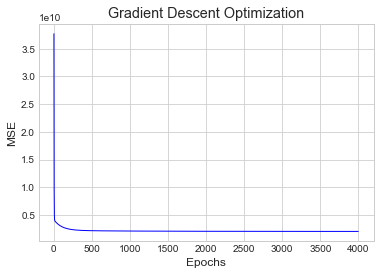

In [316]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.title('Gradient Descent Optimization')
plt.xlabel("Epochs")
plt.ylabel("MSE")

## ✍🏻 Conclusion 

- Not scaling data with my implementation makes the algorithm diverge because of the high variation in the data.
- Using a standard scaler makes the algorithm runs super fast (1 second, but the dataset is really small)

# 🔬 Comparison with scikit-learn


## Single-Feature Linear Regression

In [282]:
from sklearn import linear_model

In [283]:
df_houses = pd.read_csv('data/houses.csv')
X = df_houses['population'].values.reshape(-1,1)
y = df_houses['benefice'].values

In [284]:
X_reshaped = X.reshape(-1,1)

In [285]:
reg = linear_model.LinearRegression()
reg.fit(X_reshaped,y)

LinearRegression()

In [286]:
reg.intercept_,reg.coef_

(-3.8957808783118537, array([1.19303364]))

In [287]:
y_pred_skl = reg.predict(X)

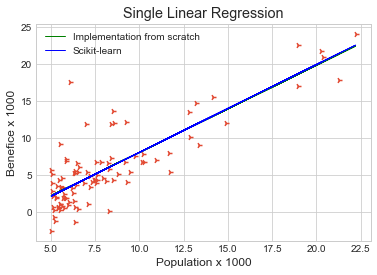

In [288]:
plt.scatter(X, y,marker="4")
plt.plot(X, y_pred, color='green', linewidth=1,label="Implementation from scratch")
plt.plot(X, y_pred_skl, color='blue', linewidth=1,label="Scikit-learn")
plt.title('Single Linear Regression')
plt.xlabel('Population x 1000')
plt.ylabel('Benefice x 1000')
plt.legend()

In [289]:
reg.predict(np.array([3.5]).reshape(-1,1))*1000

array([279.83687635])

In [290]:
reg.predict(np.array([7.0]).reshape(-1,1))*1000

array([4455.45463102])

The implementation from scratch is really close to the sklearn version.

I'm really happy I could reach this result ! 🌟

## Multi-Features Linear Regression

In [291]:
df_houses_multi = pd.read_csv('data/house_multi.csv')
df_houses_multi.columns

Index(['surface', 'rooms_nbr', 'price'], dtype='object')

In [292]:
features = ['surface','rooms_nbr']
target = 'price'

In [293]:
X = df_houses_multi[features].values.reshape(-1, len(features))
y = df_houses_multi[target].values

In [294]:
reg_multi = linear_model.LinearRegression()
reg_multi.fit(X,y)

LinearRegression()

In [295]:
theta_0,theta = reg_multi.intercept_,reg_multi.coef_
theta_0,theta

(89597.76596099927, array([  139.21063465, -8737.91542019]))

The sklearn algorithm seems finding a solution even though the data are not scaled, maybe I couldn't find the optimal parameters for learning rate.

I'm gonna however use the ``StandardScaler()`` on the data and see how theta looks like.

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X)

StandardScaler(with_mean=False)

In [297]:
x_scaled = scaler.transform(X)
x_scaled[:3]

array([[2.67615491, 3.9848956 ],
       [2.03509879, 3.9848956 ],
       [3.05264819, 3.9848956 ]])

This looks almost like our implementation, super! ✅

In [298]:
reg_multi = linear_model.LinearRegression()
reg_multi.fit(x_scaled,y)

LinearRegression()

Parameters from sklearn

In [299]:
reg_multi.intercept_,reg_multi.coef_

(89597.76596099918, array([109447.76551898,  -6578.27679028]))

Our parameters computed from scratch

In [317]:
theta_multi

array([[ 78273.4325934 ],
       [110685.37925334],
       [ -4101.87142766]])

The results are almost similar, they are a bit different because of my implementation of the Standard Scaler function probably... this was a real challenge.

# 📚Ressources & References

1. *Gradient Descent Algorithm step by step*,https://towardsdatascience.com/complete-step-by-step-gradient-descent-algorithm-from-scratch-acba013e8420
2. *Gradient Descent From Scratch*, https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
3. *Gradient Descent Algorithm, a deep dive*,https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
4. *Gradient Descent Algorithm in Python from Scratch*,https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f
5. *Cost Function and Gradient Descent*, https://towardsdatascience.com/machine-leaning-cost-function-and-gradient-descend-75821535b2ef
6. *Linear Regression with one or more variables*,https://towardsdatascience.com/machine-learning-for-biomedical-data-linear-regression-7d43461cdfa9
7. *When to perform a Feature Scaling?*, https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=Feature%20scaling%20is%20a%20method,during%20the%20data%20preprocessing%20step.
8. *Feature Scaling Machine Learning*https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
9. *Data Preprocessing in Data Mining -A Hands On Guide*,https://www.analyticsvidhya.com/blog/2021/08/data-preprocessing-in-data-mining-a-hands-on-guide/

10. *It is helpful to normalize target variables for a regression neural network?*,https://datascience.stackexchange.com/questions/35603/it-is-helpful-to-normalize-target-variables-for-a-regression-neural-network